### Things to analyze:
* Which genres got maximum >= 7 ratings?
* Which genres are most profitable?
* Average duration / genre
* Thrillers and Mysteries produced / year after 2005

In [90]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [91]:
data = pd.read_csv('movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [92]:
data['profit'] = data['gross'] - data['budget']

#### Step 1: Finding all the columns

In [93]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profit'],
      dtype='object')

#### Step 2: Selecting the columns that are relevant for analysis, and using movie title as index

In [94]:
dt = data[['genres','movie_title','language','title_year','imdb_score','duration','profit']]
# dt.set_index('movie_title', inplace=True)
dt.head()

,genres,movie_title,language,title_year,imdb_score,duration,profit
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,English,2009.0,7.9,178.0,523505847.0
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0
2,Action|Adventure|Thriller,Spectre,English,2015.0,6.8,148.0,-44925825.0
3,Action|Thriller,The Dark Knight Rises,English,2012.0,8.5,164.0,198130642.0
4,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,7.1,NaN,NaN


In [95]:
dt.shape

(5043, 7)

#### Step 3: Splitting the 'genres' column for analysis

In [96]:

s = dt['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del dt['genres']
df = dt.join(s)

In [97]:
df.head()

,movie_title,language,title_year,imdb_score,duration,profit,genres
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Action
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Adventure
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Fantasy
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0,Action


In [98]:
df.shape

(14504, 7)

In [99]:
df['genres'].unique()

array(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller',
       'Documentary', 'Romance', 'Animation', 'Comedy', 'Family',
       'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport',
       'Crime', 'Horror', 'War', 'Biography', 'Music', 'Game-Show',
       'Reality-TV', 'News', 'Short', 'Film-Noir'], dtype=object)

In [100]:
len(df['genres'].unique())

26

### Query 1:Which genres got maximum >= 7 ratings?

#### Selecting movies with rating >= 7 

In [101]:
df1 = df[df['imdb_score']>=7]

In [102]:
df1.head()

,movie_title,language,title_year,imdb_score,duration,profit,genres
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Action
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Adventure
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Fantasy
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0,Action


In [103]:
df2 = (pd.DataFrame(df1.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False )

In [104]:
df2

,movie_title
genres,
Drama,1171
Comedy,456
Thriller,367
Romance,356
Crime,311
Adventure,302
Action,275
Biography,202
Sci-Fi,184


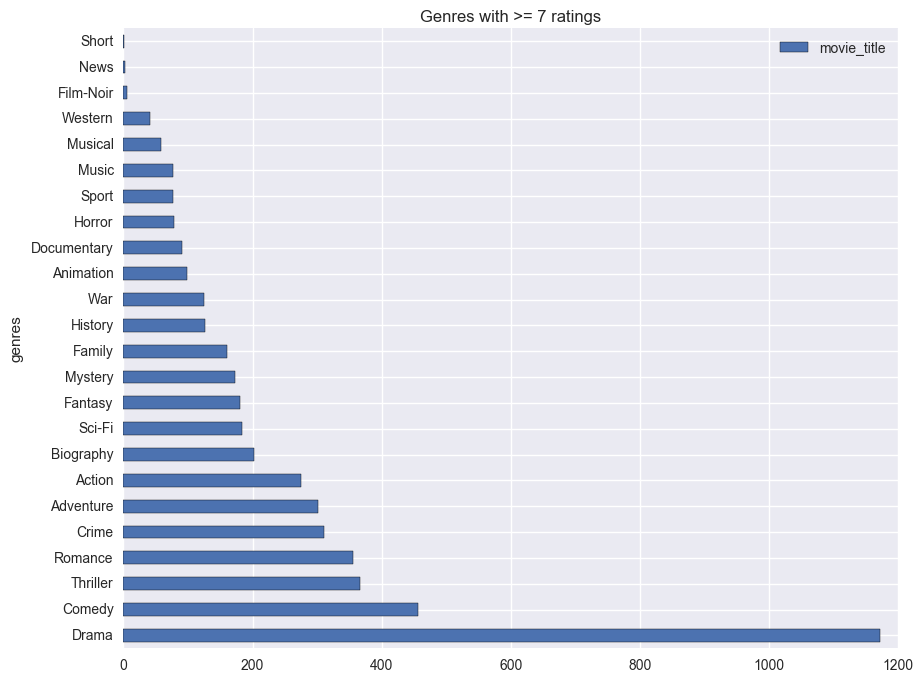

In [105]:
df2[['movie_title']].plot.barh(stacked=True, title = 'Genres with >= 7 ratings', figsize=(10, 8));

### Query 2: Which genres are most profitable?

In [106]:
df3 = df[['movie_title', 'profit','genres']]

In [107]:
df3.head()

,movie_title,profit,genres
0,Avatar,523505847.0,Action
0,Avatar,523505847.0,Adventure
0,Avatar,523505847.0,Fantasy
0,Avatar,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,9404152.0,Action


In [108]:
# Checking for NaN
df3.loc[df3['genres'] == 'News']

,movie_title,profit,genres
2265,Capitalism: A Love Story,NaN,News
4348,The Square,NaN,News
4637,Food Chains,NaN,News


In [109]:
df4 = df3.groupby(['genres']).mean()

In [110]:
df4['profit_million'] = df4['profit']/1000000
del df4['profit']

In [111]:
df4.sort_values('profit_million', ascending=False, inplace = True )

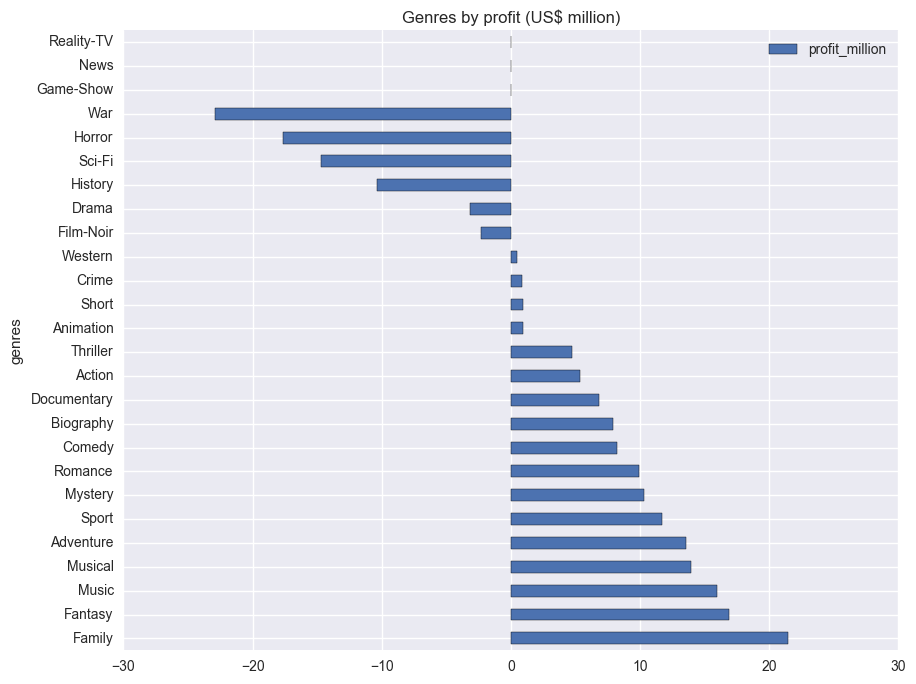

In [112]:
df4[['profit_million']].plot.barh(stacked=True, title = 'Genres by profit (US$ million)', figsize=(10, 8));

### Query 3: Average duration / genre

In [113]:
df5 = df[['movie_title', 'duration','genres']]

In [114]:
df5.head()

,movie_title,duration,genres
0,Avatar,178.0,Action
0,Avatar,178.0,Adventure
0,Avatar,178.0,Fantasy
0,Avatar,178.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,169.0,Action


In [115]:
df6 = df5.groupby(['genres']).mean()
df6['average_duration']  = df6['duration'].round(2)
del df6['duration']
df6.sort_values('average_duration', ascending=False, inplace = True )

In [116]:
df6

,average_duration
genres,
History,137.05
War,131.43
Biography,125.02
Western,120.14
Drama,112.88
Adventure,112.03
Action,110.99
Sport,110.23
Musical,109.51


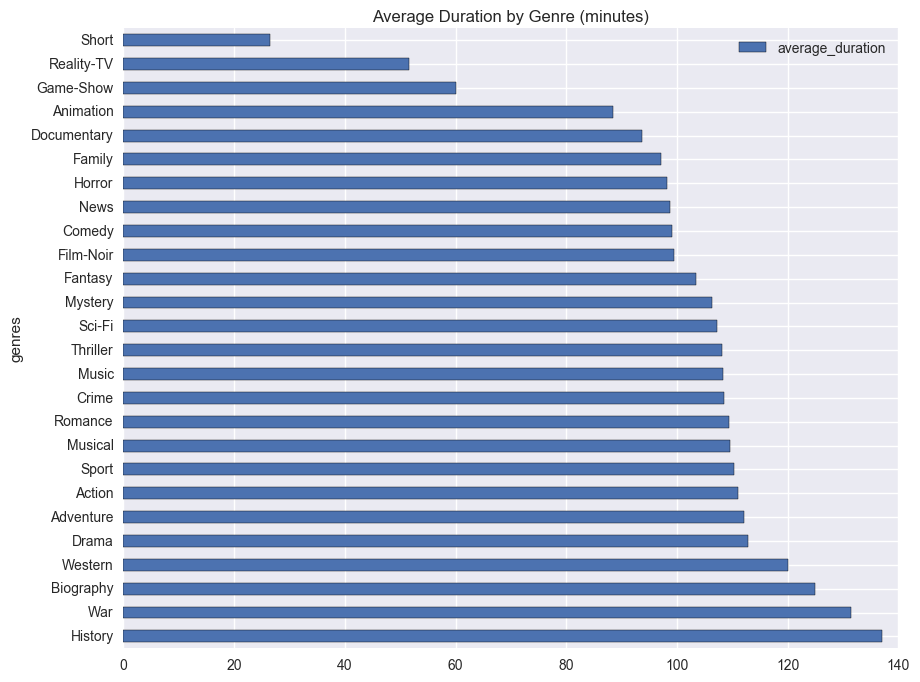

In [117]:
df6[['average_duration']].plot.barh(stacked=True, title = 'Average Duration by Genre (minutes)', figsize=(10, 8));

### Query 4: Thrillers and Mysteries produced / year after 2005

In [119]:
df7 = df[['title_year','genres']]

In [120]:
df7.head()

,title_year,genres
0,2009.0,Action
0,2009.0,Adventure
0,2009.0,Fantasy
0,2009.0,Sci-Fi
1,2007.0,Action


In [121]:
df7.shape

(14504, 2)

#### Selecting movies, released after 2005

In [122]:
df8 = df7[df7['title_year']>2005]


In [123]:
df8.shape

(6848, 2)

#### Selecting only thrillers

In [124]:
df9 = df8[df8['genres'] == 'Thriller']

In [125]:
df9.shape

(687, 2)

In [127]:
df10 = df9.groupby(['title_year']).count()

In [128]:
df10

,genres
title_year,
2006.0,62
2007.0,55
2008.0,56
2009.0,69
2010.0,60
2011.0,67
2012.0,65
2013.0,68
2014.0,80


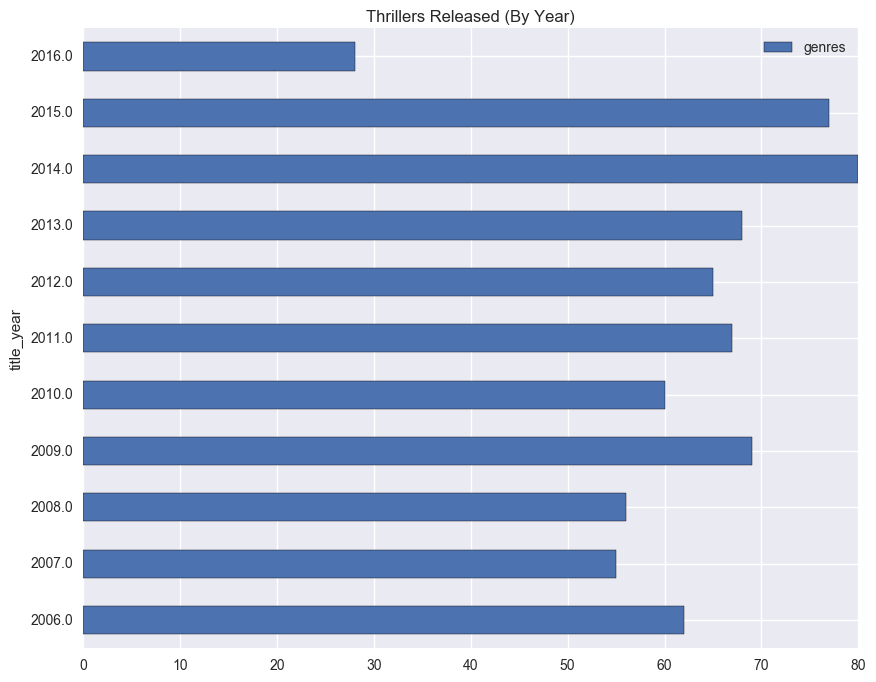

In [129]:
df10[['genres']].plot.barh(stacked=True, title = 'Thrillers Released (By Year)', figsize=(10, 8));

#### Selecting only mysteries

In [130]:
df11 = df8[df8['genres'] == 'Mystery']

In [131]:
df11.shape

(235, 2)

In [132]:
df12 = df11.groupby(['title_year']).count()

In [133]:
df12

,genres
title_year,
2006.0,23
2007.0,21
2008.0,20
2009.0,33
2010.0,18
2011.0,24
2012.0,17
2013.0,13
2014.0,28


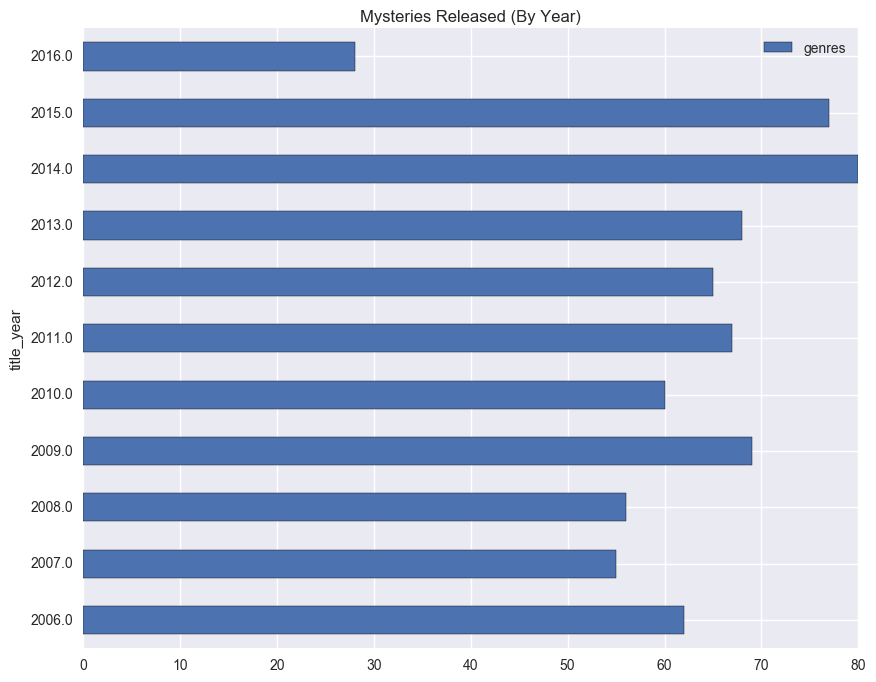

In [134]:
df10[['genres']].plot.barh(stacked=True, title = 'Mysteries Released (By Year)', figsize=(10, 8));

##### — Abhishek Chhibber